In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('day.csv')

In [24]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Text(0.5, 1.0, 'Distribution of Casual Users')

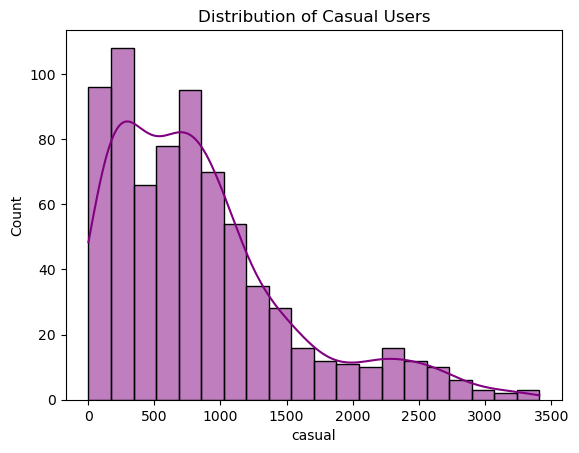

In [28]:
sns.histplot(df['casual'], kde=True, color='purple')
plt.title("Distribution of Casual Users")

Text(0.5, 1.0, 'Distribution of Registered Users')

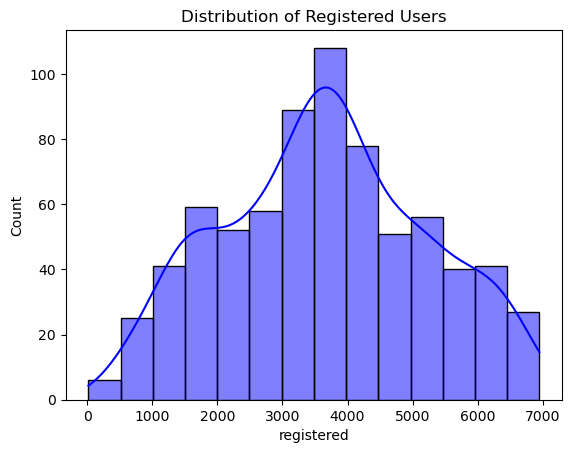

In [29]:
sns.histplot(df['registered'], kde=True, color='blue')
plt.title("Distribution of Registered Users")

Text(0.5, 0, 'Year (0=2011, 1=2012)')

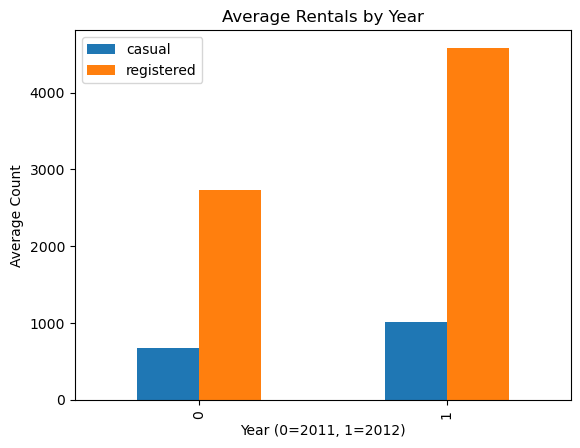

In [30]:
yearly = df.groupby('yr', as_index=False)[['casual', 'registered']].mean()

yearly.plot(x='yr', kind='bar')
plt.title("Average Rentals by Year")
plt.ylabel("Average Count")
plt.xlabel("Year (0=2011, 1=2012)")

Text(0.5, 0, 'Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')

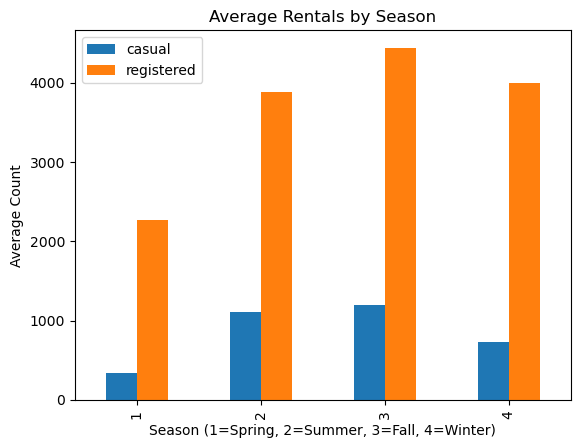

In [31]:
season_avg = df.groupby('season')[['casual', 'registered']].mean().reset_index()

season_avg.plot(x='season', kind='bar')
plt.title("Average Rentals by Season")
plt.ylabel("Average Count")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)")

Text(0, 0.5, 'Total Rentals')

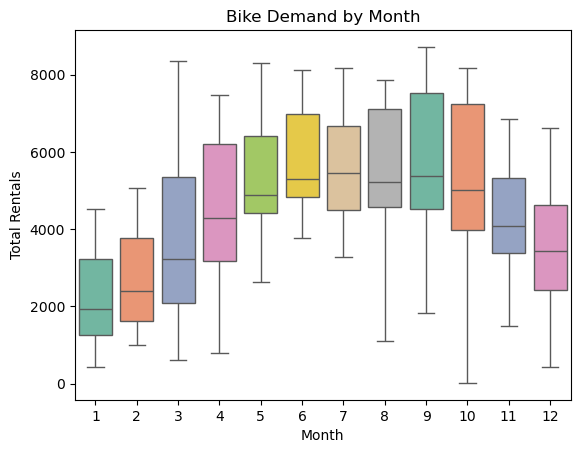

In [32]:
sns.boxplot(data=df, x='mnth', y='cnt', palette='Set2')
plt.title('Bike Demand by Month')
plt.xlabel('Month')
plt.ylabel('Total Rentals')

<Axes: >

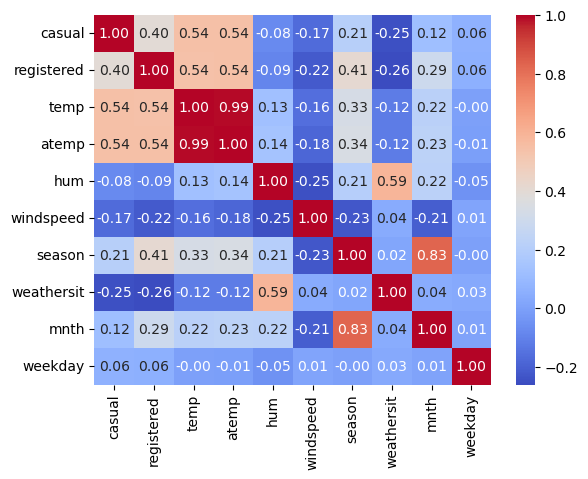

In [33]:
corr = df[['casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed',
           'season', 'weathersit', 'mnth', 'weekday']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

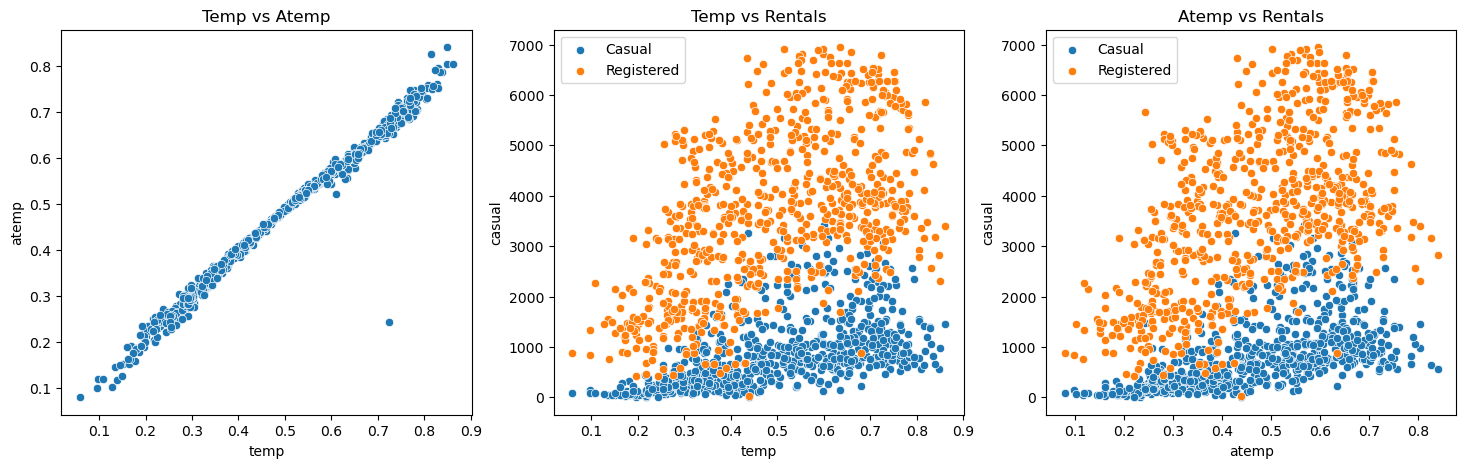

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. temp vs atemp
sns.scatterplot(x='temp', y='atemp', data=df, ax=axes[0])
axes[0].set_title("Temp vs Atemp")

# 2. temp vs rentals
sns.scatterplot(x='temp', y='casual', data=df, label='Casual', ax=axes[1])
sns.scatterplot(x='temp', y='registered', data=df, label='Registered', ax=axes[1])
axes[1].set_title("Temp vs Rentals")
axes[1].legend()

# 3. atemp vs rentals
sns.scatterplot(x='atemp', y='casual', data=df, label='Casual', ax=axes[2])
sns.scatterplot(x='atemp', y='registered', data=df, label='Registered', ax=axes[2])
axes[2].set_title("Atemp vs Rentals")
axes[2].legend()


Text(0, 0.5, 'Total Rentals')

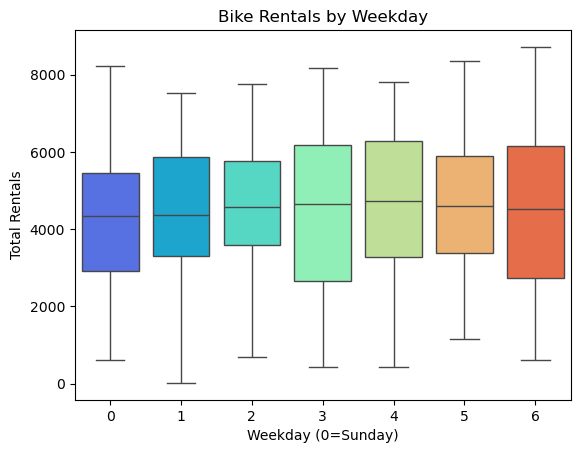

In [35]:
sns.boxplot(x='weekday', y='cnt', data=df, palette='rainbow')
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday (0=Sunday)')
plt.ylabel('Total Rentals')

In [36]:
df.drop(['atemp', 'instant', 'dteday'], axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [38]:
x = df.drop(['casual', 'registered', 'cnt'], axis=1)  
y_casual = df['casual']    
y_registered = df['registered'] 
y_total = df['cnt']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_total, test_size=0.2, random_state=42)

# Scale train/test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# Evaluation
print(f"Cross-validation R² (Total): {scores}")
print(f"Mean R² (Total): {scores.mean()}")
print("\nDirect Total Users (cnt):")
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" R² :", r2_score(y_test, y_pred))

Cross-validation R² (Total): [0.79222686 0.8080467  0.76581745 0.65131443 0.83755801]
Mean R² (Total): 0.7709926898613773

Direct Total Users (cnt):
 MAE: 620.6250906069755
 R² : 0.8270447850465305


In [40]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x, y_casual, test_size=0.2, random_state=42)
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x, y_registered, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_casual = LinearRegression()
model_casual.fit(X_train_scaled, y_train_c)


model_registered = LinearRegression()
model_registered.fit(X_train_scaled, y_train_r)

LinearRegression()

In [41]:
y_casual_pred = model_casual.predict(X_test_scaled)
y_registered_pred = model_registered.predict(X_test_scaled)

# Combined model
y_total_pred = y_casual_pred + y_registered_pred
y_total_true = y_test_c.values + y_test_r.values


# Evaluation for casual model
mae_casual = mean_absolute_error(y_test_c.values, y_casual_pred)
r2_casual = r2_score(y_test_c.values, y_casual_pred)
# Print casual model metrics
print("\nCasual Model: ")
print(f"MAE: {mae_casual:.2f}")
print(f"R² : {r2_casual:.4f}")

# Evaluation for registered model
mae_registered = mean_absolute_error(y_test_r.values, y_registered_pred)
r2_registered = r2_score(y_test_r.values, y_registered_pred)

# Print registered model metrics
print("\nRegistered Model: ")
print(f"MAE: {mae_registered:.2f}")
print(f"R² : {r2_registered:.4f}")

# Combined model metrics
mae_total = mean_absolute_error(y_total_true, y_total_pred)
r2_total = r2_score(y_total_true, y_total_pred)

print("\nCombined Model: ")
print(f"MAE: {mae_total:.2f}")
print(f"R² : {r2_total:.4f}")



Casual Model: 
MAE: 267.80
R² : 0.7003

Registered Model: 
MAE: 500.40
R² : 0.8221

Combined Model: 
MAE: 620.63
R² : 0.8270


In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("R2:", r2)

# cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nCross-validation R2 scores(Direct cnt):", cv_scores)
print("Mean R²:", cv_scores.mean())

MAE: 431.8945578231293
R2: 0.8831982463760982

Cross-validation R2 scores(Direct cnt): [0.91535252 0.84740147 0.82156344 0.79439065 0.90022634]
Mean R²: 0.8557868842882842


In [43]:
from sklearn.tree import DecisionTreeRegressor  

dt_model = DecisionTreeRegressor(
    max_depth=10, 
    random_state=42
)

# Fit
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor (Direct cnt): ")
print(f"  MAE: {mae:.2f}")
print(f"  R² : {r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring="r2")
print("\nCross-validation R²:", cv_scores)
print("Mean R²:", cv_scores.mean())

Decision Tree Regressor (Direct cnt): 
  MAE: 561.06
  R² : 0.8075

Cross-validation R²: [0.75593134 0.66750348 0.71922766 0.53693779 0.80477745]
Mean R²: 0.6968755432193483


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_total, test_size=0.2, random_state=42)

# Model
xgb = XGBRegressor(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # depth of trees
    random_state=42
)

# Fit
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost (Direct Total Users):")
print(f"  MAE: {mae:.2f}")
print(f"  R² : {r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R²:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))


XGBoost (Direct Total Users):
  MAE: 446.10
  R² : 0.8879
Cross-validation R²: [0.90335417 0.85374379 0.80830795 0.78589326 0.86972195]
Mean CV R²: 0.8442042231559753
